# Data loading and plot testing

## *10x Adult Brain Dataset*

In [7]:
library(Signac)
library(Seurat)
library(EnsDb.Hsapiens.v86)
library(BSgenome.Hsapiens.UCSC.hg38)
library(ggplot2)
library(pheatmap)
library(viridis)
library(RColorBrewer)

In [8]:
setwd("/lustre/groups/ies/projects/hamperl_lab/elizabeth.marquezgom/scMultiomicsCourse")

# Building Seurat object

In [9]:
# Get gene annotations for hg38
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevels(annotation) <- paste0("chr", seqlevels(annotation))
genome(annotation) <- "hg38"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [10]:
## Load count matrices
counts_raw <- Read10X_h5(filename = "data/human_brain_3k_raw_feature_bc_matrix.h5")

counts_filtered <- Read10X_h5(filename = "data/human_brain_3k_filtered_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [11]:
## Visualize some counts_raw rows - sparse matrix format
metadata <- read.csv(
    file = "data/human_brain_3k_per_barcode_metrics.csv",
    header = TRUE,
    row.names = 1
)

In [ ]:
## Import the list of cell barcodes to be used in the experiment
CellSubset <- readRDS("data/lessonCells_byCluster.RDS")

In [7]:
## Create a Seurat object containing the RNA adata
multiObj <- CreateSeuratObject(
    counts = counts_raw$`Gene Expression`[, CellSubset],
    assay = "RNA",
    meta.data = metadata,
    project = "Brain",
    min.features = 1,
    min.cells = 1
)
multiObj

An object of class Seurat 
29856 features across 2736 samples within 1 assay 
Active assay: RNA (29856 features, 0 variable features)
 1 layer present: counts

In [8]:
## Create ATAC assay and add it to the object
multiObj[["ATAC"]] <- CreateChromatinAssay(
    counts = counts_raw$Peaks[, Cells(multiObj[["RNA"]])], # subset the matrix to keep only cells that are in the RNA object
    sep = c(":", "-"),
    fragments = "data/human_brain_3k_atac_fragments.tsv.gz",
    annotation = annotation,
    genome = "hg38",
    validate.fragments = T,
    min.features = 1,
    min.cells = 1
)

Computing hash



In [ ]:
# Seeing only int numbers means data was not normalized
multiObj <- subset(multiObj, cells = Cells(multiObj[["ATAC"]]))
multiObj

An object of class Seurat 
163885 features across 2736 samples within 2 assays 
Active assay: RNA (29856 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC

In [10]:
## Empty memory
rm(counts_filtered)
rm(counts_raw)
#rm(objFiltered)
gc()

used     (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells 15297502 817.0  22302830  1191.1  22302830 1191.1
Vcells 95429142 728.1 271163768  2068.9 338954696 2586.1

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


Warning message:
"The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."
Warning message:
"`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."


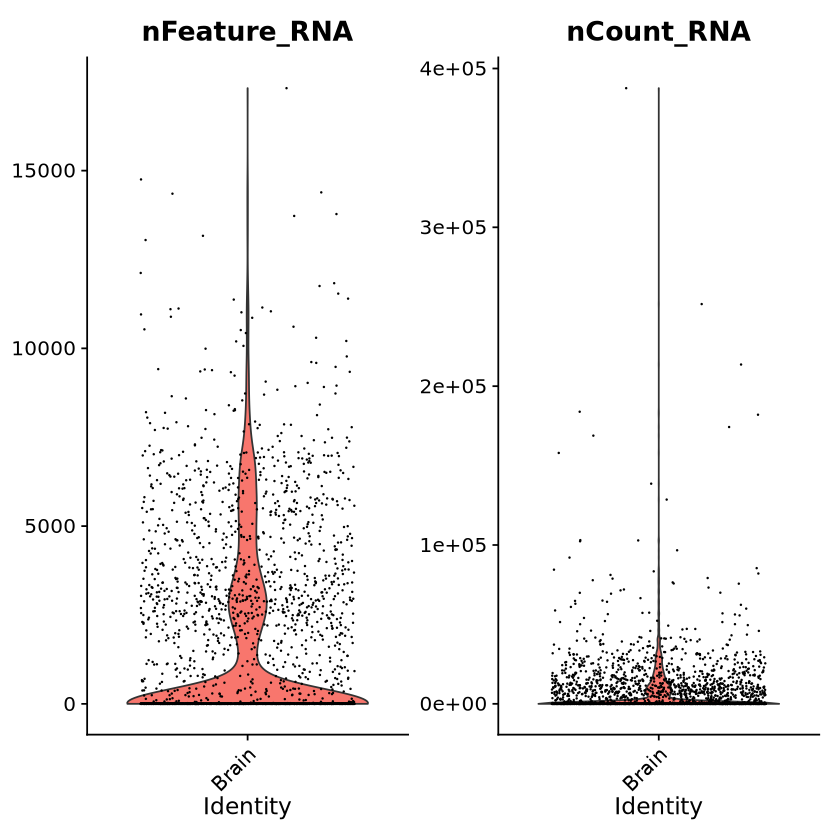

In [11]:
#Generating violin plots
# Feature -> number of genes
# Count -> number of UMIs
DefaultAssay(multiObj) <- 'RNA'
VlnPlot(multiObj, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

Warning message:
"The `slot` argument of `VlnPlot()` is deprecated as of Seurat 5.0.0.
ℹ Please use the `layer` argument instead."


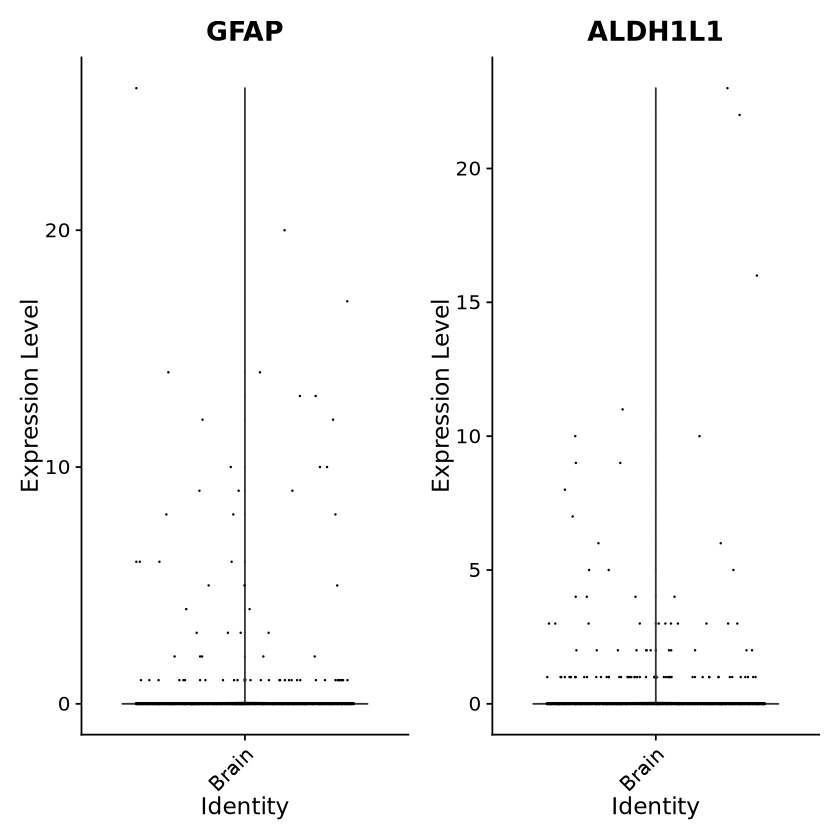

In [12]:
VlnPlot(multiObj, features = c("GFAP", "ALDH1L1"), slot = "counts")

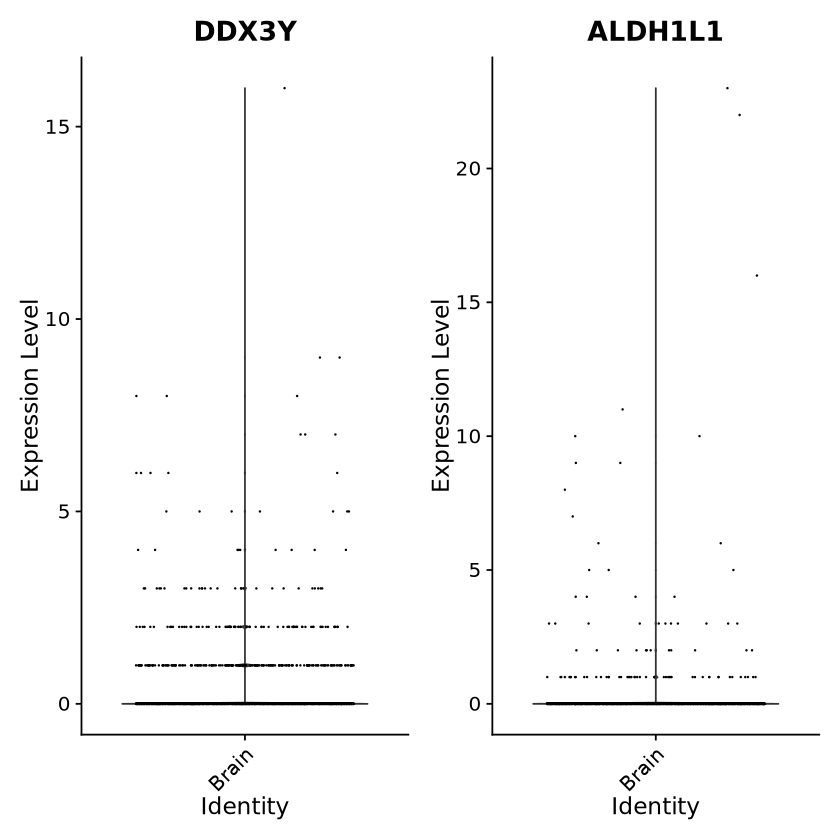

In [13]:
VlnPlot(multiObj, features = c("DDX3Y", "ALDH1L1"), slot = "counts")

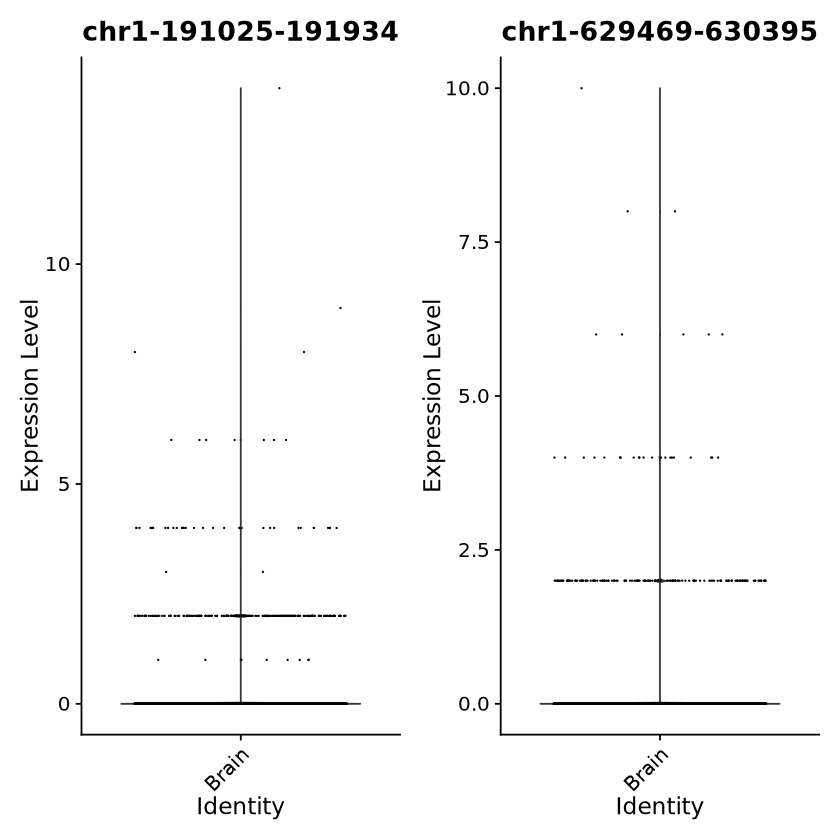

In [14]:
## Specific peaks
# y-axis is how many fragments per cell were found in that region, not expression level
DefaultAssay(multiObj) <- 'ATAC'
VlnPlot(multiObj, features = c("chr1-191025-191934", "chr1-629469-630395"), ncol = 2)

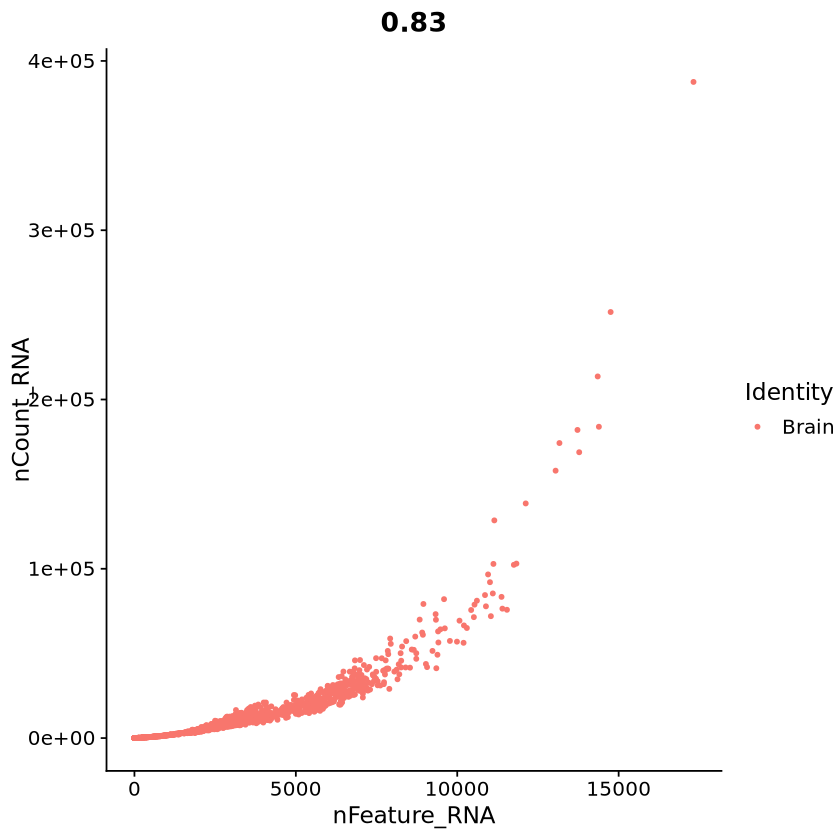

In [15]:
## Generating scatter plots
# Title corresponds to the correlation coefficient
FeatureScatter(multiObj, feature1 = 'nFeature_RNA', feature2 = 'nCount_RNA', slot = "count")

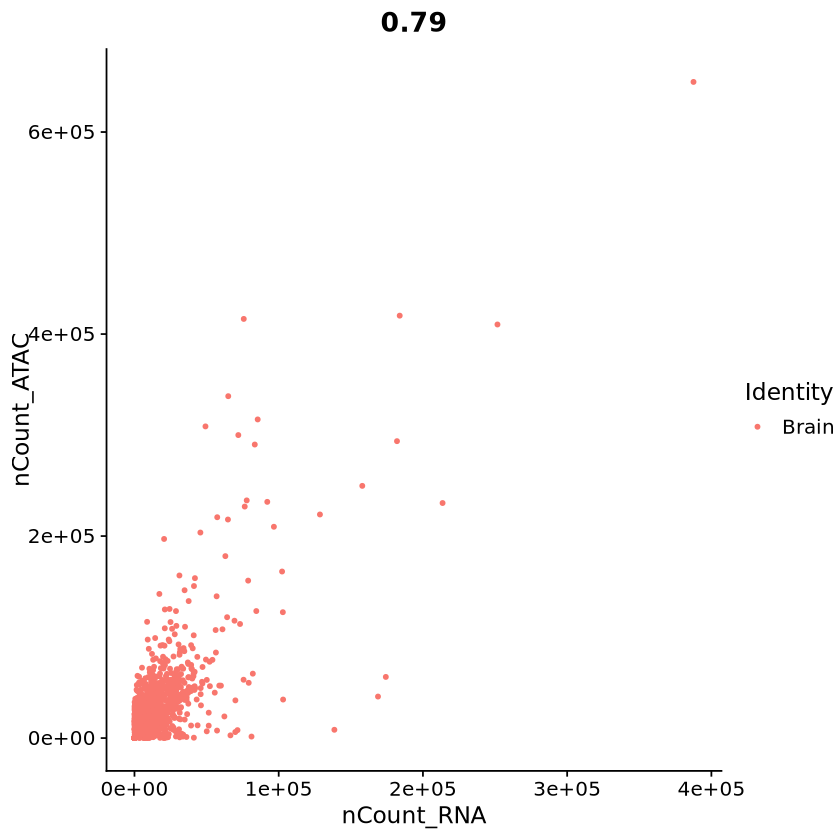

In [16]:
FeatureScatter(multiObj, feature1 = 'nCount_RNA', feature2 = 'nCount_ATAC', slot = "count")

Warning message:
"Could not find GFAP in the default search locations, found in 'RNA' assay instead"
Warning message:
"Could not find ALDH1L1 in the default search locations, found in 'RNA' assay instead"


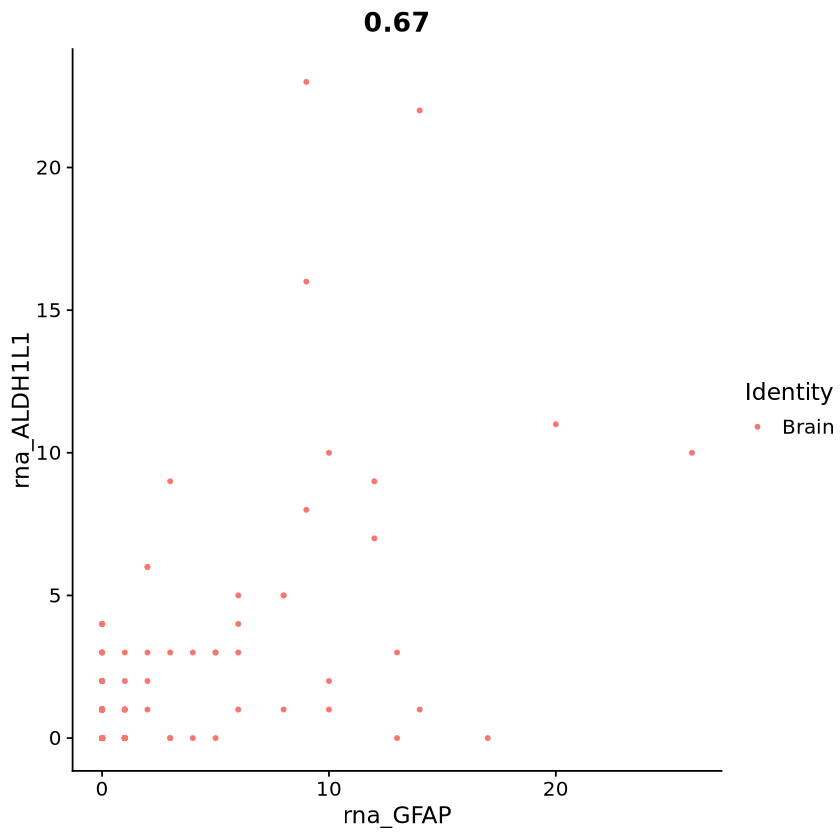

In [17]:
FeatureScatter(multiObj, feature1 = 'GFAP', feature2 = 'ALDH1L1', slot = "count")

In [ ]:
## RNA assay data
multiObj@assays$RNA

Assay (v5) data with 29856 features for 2736 cells
First 10 features:
 AL627309.1, AL627309.3, AL627309.5, AL627309.4, AP006222.2, AL669831.2,
LINC01409, LINC01128, LINC00115, FAM41C 
Layers:
 counts 

In [ ]:
## RNA counts matrix
multiObj[['RNA']]$counts

  [[ suppressing 32 column names 'AAACCAACATAGACCC-1', 'AAACCGAAGATGCCTG-1', 'AAACCGAAGTTAGCTA-1' ... ]]

  [[ suppressing 32 column names 'AAACCAACATAGACCC-1', 'AAACCGAAGATGCCTG-1', 'AAACCGAAGTTAGCTA-1' ... ]]

  [[ suppressing 32 column names 'AAACCAACATAGACCC-1', 'AAACCGAAGATGCCTG-1', 'AAACCGAAGTTAGCTA-1' ... ]]



29856 x 2736 sparse Matrix of class "dgCMatrix"
                                                                                             
AL627309.1    .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   1  . .
AL627309.3    .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
AL627309.5    .  .  . .   . .  .  . .  1  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
AL627309.4    .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
AP006222.2    .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
AL669831.2    .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
LINC01409     .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   1  3  .   .  .  2   .  . .
LINC01128     .  .  1 .   1 .  .  . .  1  .  .  .  .  .  2  .  .   .  .  1   .  .  .   .  . .
LINC00115     .  .  . .   . .  .  . .  .  .  .  .  .  .  .  .  .   .  .  .   .  .  .   .  . .
FAM41C      

In [20]:
## Extract mitochondrial genes and sum counts

# Get all features from RNA assya
genes <- row.names(multiObj[['RNA']]$counts)
# Filter mitochondrial genes
id <- grepl(genes, pattern='^MT-')
mt_genes <- genes[id]
mt_genes

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

In [ ]:
## Calculate fraction of mitochondrial gene counts
colSums(multiObj[['RNA']]$counts[mt_genes,])/colSums(multiObj[['RNA']]$counts)

AAACCAACATAGACCC-1 AAACCGAAGATGCCTG-1 AAACCGAAGTTAGCTA-1 AAACCGCGTCTTACTA-1 
      0.000000e+00       1.047875e-03       1.286449e-03       6.310680e-03 
AAACCGGCAATCCCTT-1 AAACCGGCAGCAACAG-1 AAACGCGCATTGGGAG-1 AAACGGATCATGAAGG-1 
      3.694983e-03       1.976285e-02       2.437326e-03       1.828822e-03 
AAAGCACCAAGTAAGC-1 AAAGCGGGTGAGCAAG-1 AAAGCGGGTGGAAACG-1 AAAGCTTGTCGCGCAA-1 
      1.470588e-02       2.599896e-03       3.007715e-03       9.444654e-04 
AAAGGAGCACAAAGGT-1 AAAGGAGCACGAATTT-1 AAAGGTTAGTGAGGGT-1 AAATGGCCAGAAATTG-1 
      6.744908e-04       4.975124e-03       1.156872e-03       2.041137e-03 
AACAAGCCATAACGGG-1 AACAGATAGGCTAAGA-1 AACAGCAAGACTTATG-1 AACAGCAAGGCAAGTA-1 
      1.569448e-03       6.743088e-04       1.514306e-03       1.863933e-03 
AACAGCAAGGTGCTGC-1 AACATAGCACTAGGTC-1 AACCCGCAGATGGACA-1 AACCGCTCATTATGGT-1 
      2.406314e-03       1.362676e-03       4.452756e-03       3.704733e-04 
AACCTAATCAATGTGC-1 AACGGTAAGACTCGCA-1 AACGGTAAGGCCTGGT-1 AACTAGCTCAGGCTAT-1 
      1.366710e-03       1.477331e-02       1.630435e-02       7.439973e-03 
AACTAGCTCCGTTATT-1 AACTCACAGCGTGCAC-1 AACTGTTCAGAACCGA-1 AACTGTTCATGCTTAG-1 
      3.840351e-03       3.664641e-03       3.093581e-03       4.728132e-03 
AACTTAGTCAGTGAAG-1 AAGAATCAGGAACCGG-1 AAGACAAGTTGGTTCT-1 AAGACATAGTAACGAG-1 
      1.106383e-02       2.500329e-03       1.503609e-03       2.261347e-03 
AAGCAAGTCGCACAAT-1 AAGCCACGTCATCCTG-1 AAGCCACGTTGAGGTC-1 AAGCCTCCATGTTGGC-1 
      1.336801e-02       9.157509e-03       3.162555e-04       4.458599e-02 
AAGCCTTAGGGTGAGT-1 AAGCGAGGTACAATGT-1 AAGCGAGGTGATTTGG-1 AAGCTAGAGCGGATAA-1 
      9.345794e-04       3.125000e-03       1.105176e-03       1.838477e-03 
AAGGATGTCACGCGGT-1 AAGGATGTCATAGCCG-1 AAGGCCCTCAAGGACA-1 AAGGTATAGTTAGGCT-1 
      1.474090e-03       3.263708e-03       7.618725e-04       3.042905e-04 
AAGGTGCAGGAACGCG-1 AAGGTGCAGTAAAGGT-1 AAGTAGCCAAATATCC-1 AAGTCTATCATGACCG-1 
      3.610108e-03       1.108205e-03       1.843318e-03       2.257761e-03 
AAGTTACGTGTTTGCT-1 AATATCCCACCTCGCT-1 AATCATCCAAGGTCCT-1 AATCATCCAATGAAGC-1 
      3.409091e-03       3.645311e-04       1.291600e-04       3.838338e-03 
AATCATGTCATTCATC-1 AATCCATCAAAGCTCC-1 AATCCATCATGAGTTT-1 AATCCCTGTAGCTGCG-1 
      1.895375e-04       1.716528e-03       2.952901e-04       6.852729e-04 
AATCCGTAGGGCCATC-1 AATCCGTAGTTAGAGG-1 AATCGCCCATGCTTAG-1 AATCTCAAGAGGAGGA-1 
      7.692308e-03       2.032176e-03       3.336670e-04       2.177356e-03 
AATGCAACAGTACCGT-1 AATGCATGTGAGACTC-1 AATTACCCAGCAAGGC-1 AATTCGTCATCCTGAA-1 
      3.737950e-03       1.643048e-03       1.530515e-03       1.502581e-03 
AATTCGTCATGTGGGA-1 AATTGACGTTGAATCG-1 AATTGCCAGTAACCAC-1 AATTGGGAGGCGGGTA-1 
      1.942162e-03       1.259219e-03       2.497918e-03       7.672398e-03 
AATTTCCTCGCAATCG-1 ACAAACTGTTAATGCG-1 ACAACACTCTGTGCCT-1 ACACAATGTTCCGGCT-1 
      1.647606e-03       1.281113e-03       2.553382e-04       1.223776e-03 
ACACCTTGTAGGATCC-1 ACACGGACACCTAAGC-1 ACACGGACATATTGAC-1 ACACTAGGTTGGCCGA-1 
      2.579758e-04       3.925344e-03       7.288630e-03       1.004857e-03 
ACAGCCGGTAACGGGA-1 ACAGCCGGTGGTTCCC-1 ACAGCGCTCTGCAAAC-1 ACAGGAATCATGACCG-1 
      9.547190e-04       9.708738e-03       6.837607e-03       1.391595e-04 
ACAGGAATCCGTCCAT-1 ACAGGATCAACCTAAT-1 ACAGGATCAGGACCAA-1 ACATTAGTCCCGAAGC-1 
      1.247327e-03       1.764057e-02       2.360346e-03       2.116242e-03 
ACATTGCAGCGGATTT-1 ACATTGCAGGAACACA-1 ACCAAACTCAATGAGG-1 ACCAAACTCCGCCTCA-1 
      1.165501e-03       5.886600e-03       1.056068e-03       5.646527e-03 
ACCAAGTTCCTTCTAG-1 ACCAAGTTCGCTTCTA-1 ACCACATAGCTCCCTG-1 ACCATAATCATTTGCT-1 
      4.929925e-04       1.449275e-03       1.938421e-03       3.989656e-03 
ACCATAATCCTGATTT-1 ACCCAACCATTATGGT-1 ACCGAAGCACGAACAG-1 ACCGGTTCAATTGCGC-1 
      4.983803e-04       1.522501e-02       2.467474e-03       1.255861e-03 
ACCGGTTCAGCAGGTA-1 ACCTAAATCGTCATTT-1 ACCTAAGGTTGGTTAG-1 ACCTAAGGTTTGCGCC-1 
      2.355528e-04       5.712980e-04       1.843601e-03       6.460439e-

In [22]:
#Compute the fraction mapping to mitochondrial genes with Seurat
DefaultAssay(multiObj) <- 'RNA'
PercentageFeatureSet(multiObj, pattern = "^MT-")

AAACCAACATAGACCC-1 AAACCGAAGATGCCTG-1 AAACCGAAGTTAGCTA-1 AAACCGCGTCTTACTA-1 
       0.000000000        0.104787478        0.128644940        0.631067961 
AAACCGGCAATCCCTT-1 AAACCGGCAGCAACAG-1 AAACGCGCATTGGGAG-1 AAACGGATCATGAAGG-1 
       0.369498279        1.976284585        0.243732591        0.182882224 
AAAGCACCAAGTAAGC-1 AAAGCGGGTGAGCAAG-1 AAAGCGGGTGGAAACG-1 AAAGCTTGTCGCGCAA-1 
       1.470588235        0.259989600        0.300771544        0.094446543 
AAAGGAGCACAAAGGT-1 AAAGGAGCACGAATTT-1 AAAGGTTAGTGAGGGT-1 AAATGGCCAGAAATTG-1 
       0.067449076        0.497512438        0.115687182        0.204113676 
AACAAGCCATAACGGG-1 AACAGATAGGCTAAGA-1 AACAGCAAGACTTATG-1 AACAGCAAGGCAAGTA-1 
       0.156944808        0.067430883        0.151430621        0.186393290 
AACAGCAAGGTGCTGC-1 AACATAGCACTAGGTC-1 AACCCGCAGATGGACA-1 AACCGCTCATTATGGT-1 
       0.240631417        0.136267630        0.445275626        0.037047328 
AACCTAATCAATGTGC-1 AACGGTAAGACTCGCA-1 AACGGTAAGGCCTGGT-1 AACTAGCTCAGGCTAT-1 
       0.136670983        1.477330616        1.630434783        0.743997295 
AACTAGCTCCGTTATT-1 AACTCACAGCGTGCAC-1 AACTGTTCAGAACCGA-1 AACTGTTCATGCTTAG-1 
       0.384035112        0.366464069        0.309358082        0.472813239 
AACTTAGTCAGTGAAG-1 AAGAATCAGGAACCGG-1 AAGACAAGTTGGTTCT-1 AAGACATAGTAACGAG-1 
       1.106382979        0.250032899        0.150360866        0.226134712 
AAGCAAGTCGCACAAT-1 AAGCCACGTCATCCTG-1 AAGCCACGTTGAGGTC-1 AAGCCTCCATGTTGGC-1 
       1.336801040        0.915750916        0.031625553        4.458598726 
AAGCCTTAGGGTGAGT-1 AAGCGAGGTACAATGT-1 AAGCGAGGTGATTTGG-1 AAGCTAGAGCGGATAA-1 
       0.093457944        0.312500000        0.110517591        0.183847669 
AAGGATGTCACGCGGT-1 AAGGATGTCATAGCCG-1 AAGGCCCTCAAGGACA-1 AAGGTATAGTTAGGCT-1 
       0.147409003        0.326370757        0.076187251        0.030429050 
AAGGTGCAGGAACGCG-1 AAGGTGCAGTAAAGGT-1 AAGTAGCCAAATATCC-1 AAGTCTATCATGACCG-1 
       0.361010830        0.110820515        0.184331797        0.225776105 
AAGTTACGTGTTTGCT-1 AATATCCCACCTCGCT-1 AATCATCCAAGGTCCT-1 AATCATCCAATGAAGC-1 
       0.340909091        0.036453112        0.012916003        0.383833823 
AATCATGTCATTCATC-1 AATCCATCAAAGCTCC-1 AATCCATCATGAGTTT-1 AATCCCTGTAGCTGCG-1 
       0.018953753        0.171652771        0.029529012        0.068527286 
AATCCGTAGGGCCATC-1 AATCCGTAGTTAGAGG-1 AATCGCCCATGCTTAG-1 AATCTCAAGAGGAGGA-1 
       0.769230769        0.203217612        0.033366700        0.217735550 
AATGCAACAGTACCGT-1 AATGCATGTGAGACTC-1 AATTACCCAGCAAGGC-1 AATTCGTCATCCTGAA-1 
       0.373795003        0.164304785        0.153051464        0.150258052 
AATTCGTCATGTGGGA-1 AATTGACGTTGAATCG-1 AATTGCCAGTAACCAC-1 AATTGGGAGGCGGGTA-1 
       0.194216240        0.125921928        0.249791840        0.767239786 
AATTTCCTCGCAATCG-1 ACAAACTGTTAATGCG-1 ACAACACTCTGTGCCT-1 ACACAATGTTCCGGCT-1 
       0.164760613        0.128111274        0.025533816        0.122377622 
ACACCTTGTAGGATCC-1 ACACGGACACCTAAGC-1 ACACGGACATATTGAC-1 ACACTAGGTTGGCCGA-1 
       0.025797575        0.392534439        0.728862974        0.100485681 
ACAGCCGGTAACGGGA-1 ACAGCCGGTGGTTCCC-1 ACAGCGCTCTGCAAAC-1 ACAGGAATCATGACCG-1 
       0.095471904        0.970873786        0.683760684        0.013915948 
ACAGGAATCCGTCCAT-1 ACAGGATCAACCTAAT-1 ACAGGATCAGGACCAA-1 ACATTAGTCCCGAAGC-1 
       0.124732716        1.764057332        0.236034618        0.211624216 
ACATTGCAGCGGATTT-1 ACATTGCAGGAACACA-1 ACCAAACTCAATGAGG-1 ACCAAACTCCGCCTCA-1 
       0.116550117        0.588659966        0.105606759        0.564652739 
ACCAAGTTCCTTCTAG-1 ACCAAGTTCGCTTCTA-1 ACCACATAGCTCCCTG-1 ACCATAATCATTTGCT-1 
       0.049299246        0.144927536        0.193842131        0.398965645 
ACCATAATCCTGATTT-1 ACCCAACCATTATGGT-1 ACCGAAGCACGAACAG-1 ACCGGTTCAATTGCGC-1 
       0.049838026        1.522501151        0.246747420        0.125586068 
ACCGGTTCAGCAGGTA-1 ACCTAAATCGTCATTT-1 ACCTAAGGTTGGTTAG-1 ACCTAAGGTTTGCGCC-1 
       0.023555276        0.057129799        0.184360117        0.0646043

# Homework assignment

### 1. Build the Seurat object with the cells assigned to you

In [ ]:
## Load count matrix
counts_raw <- Read10X_h5(filename = "data/human_brain_3k_raw_feature_bc_matrix.h5")

## Import the list of selected cell barcodes to be used in the experiment
selected_cells <- readRDS("data/homeworkCells_byCluster.RDS")

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [ ]:
## Create a Seurat object containing the RNA adata
selected_obj <- CreateSeuratObject(
    counts = counts_raw$`Gene Expression`[, selected_cells],
    assay = "RNA",
    meta.data = metadata,
    project = "Brain",
    min.features = 1,
    min.cells = 1
)
selected_obj

An object of class Seurat 
28779 features across 3681 samples within 1 assay 
Active assay: RNA (28779 features, 0 variable features)
 1 layer present: counts

### 2. Generate violin plots and scatter plots of the counts associated with the following genes: *MOG, MBP, CDH5, VWF*

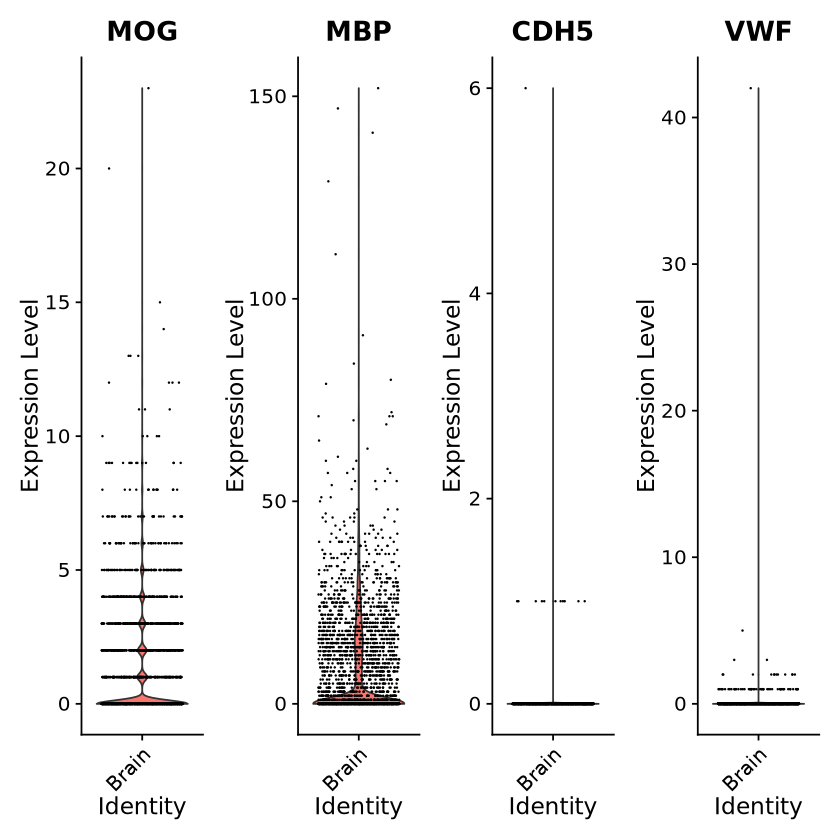

In [15]:
#Generating violin plots
DefaultAssay(selected_obj) <- 'RNA'
VlnPlot(selected_obj, features = c("MOG", "MBP", "CDH5", "VWF"), slot = "counts", ncol = 4)

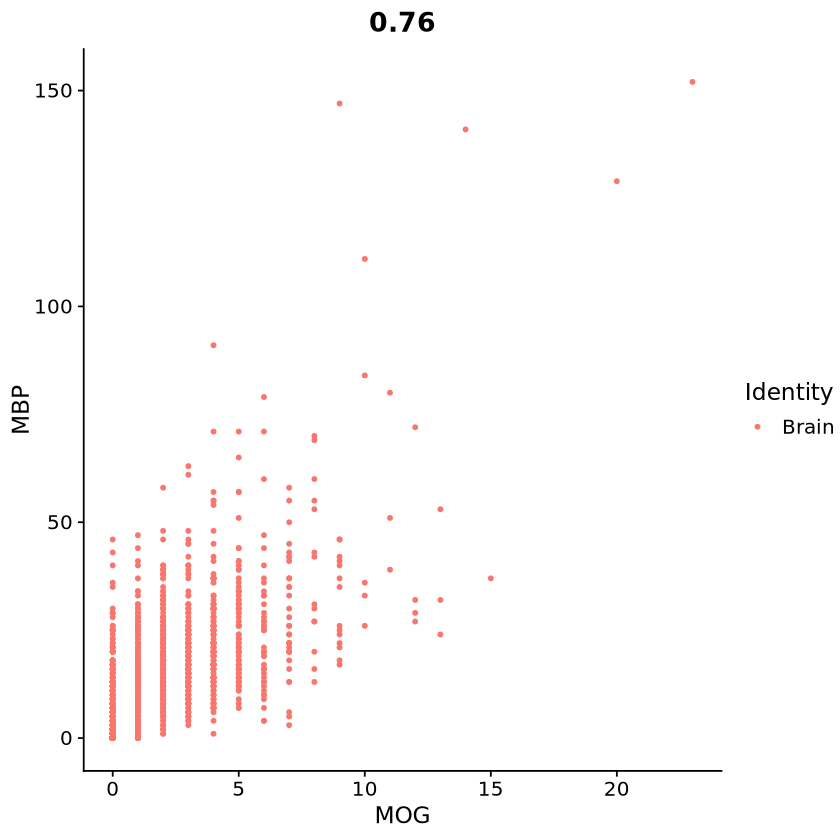

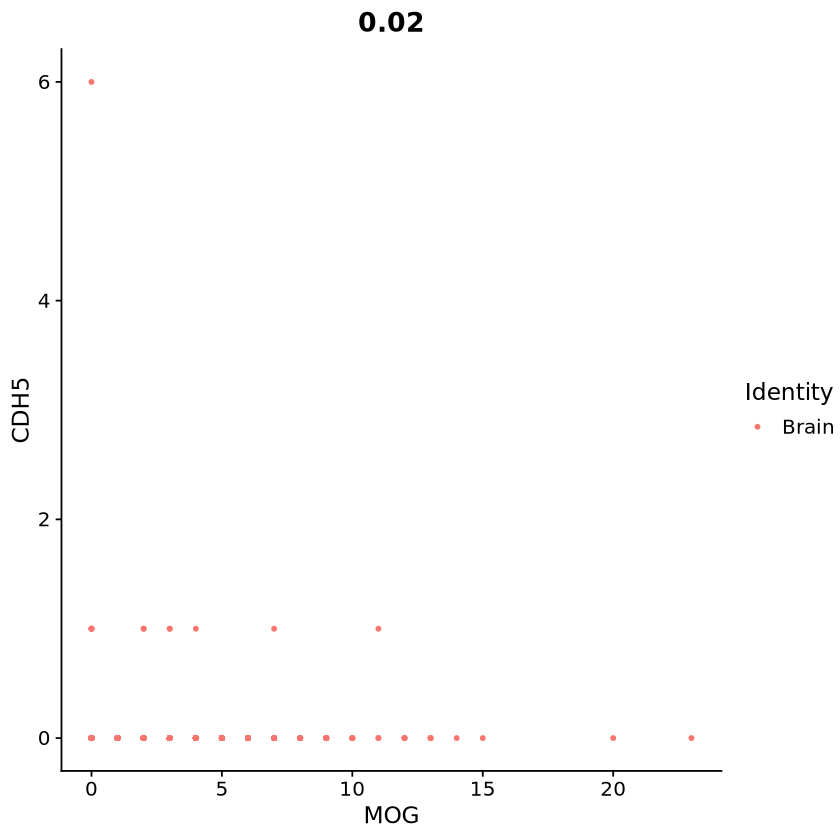

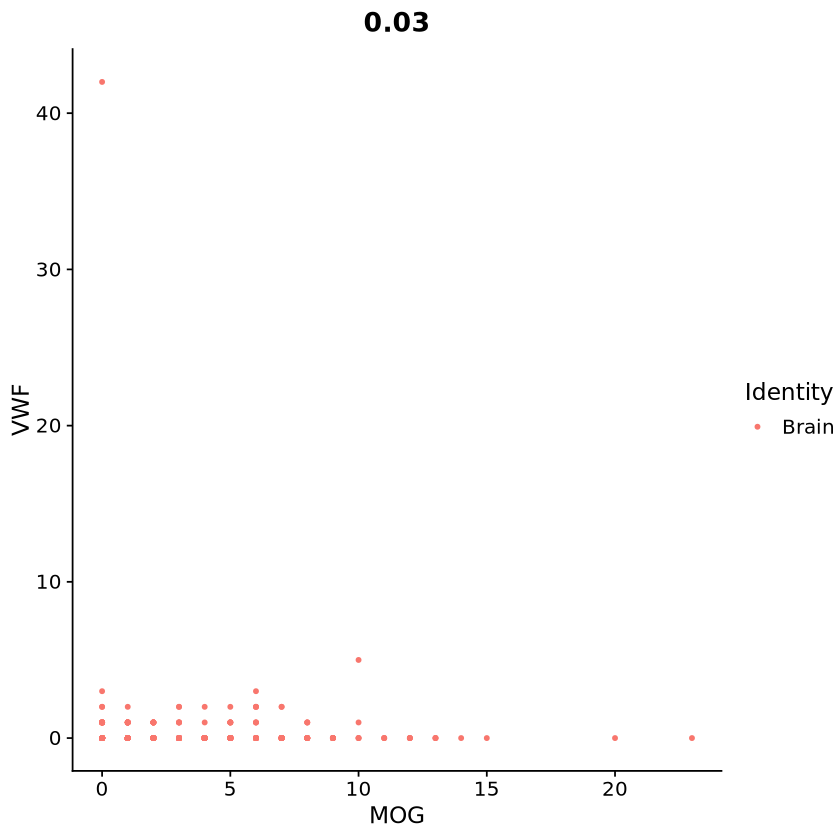

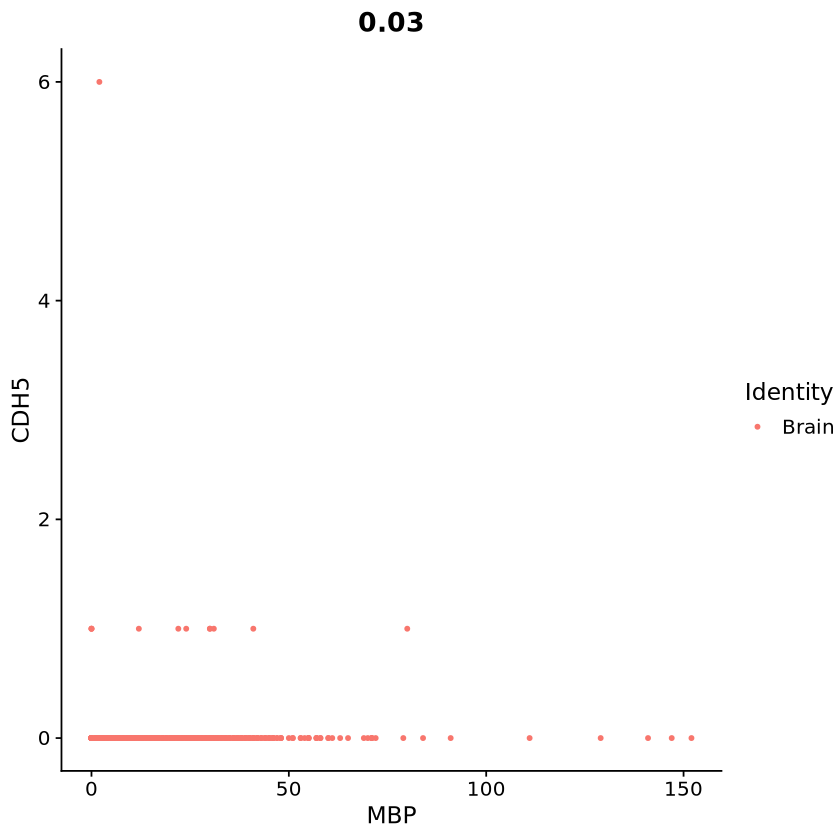

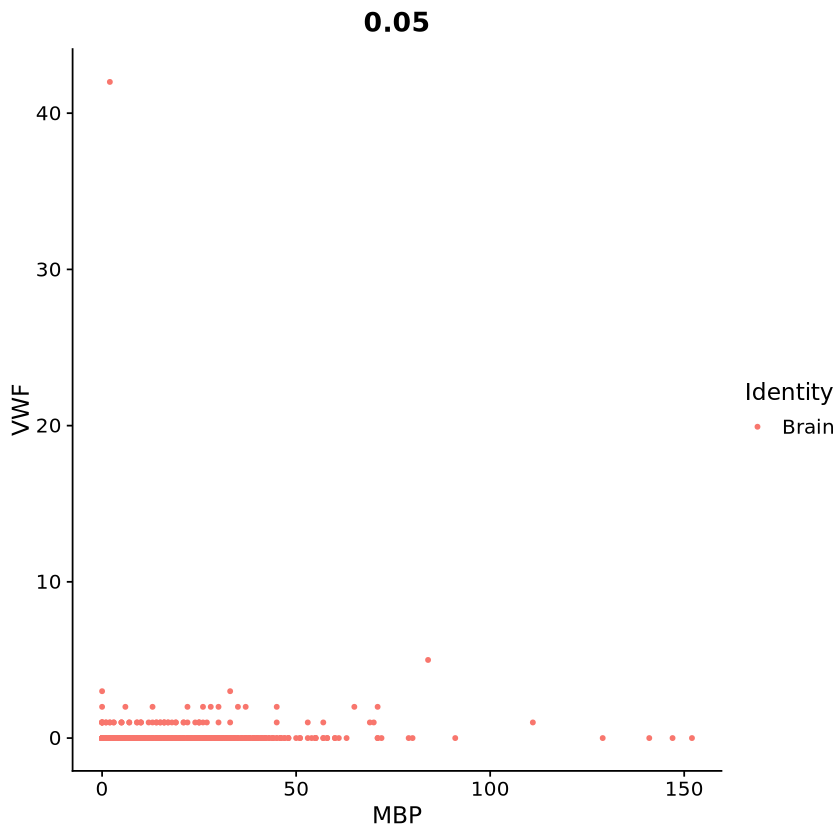

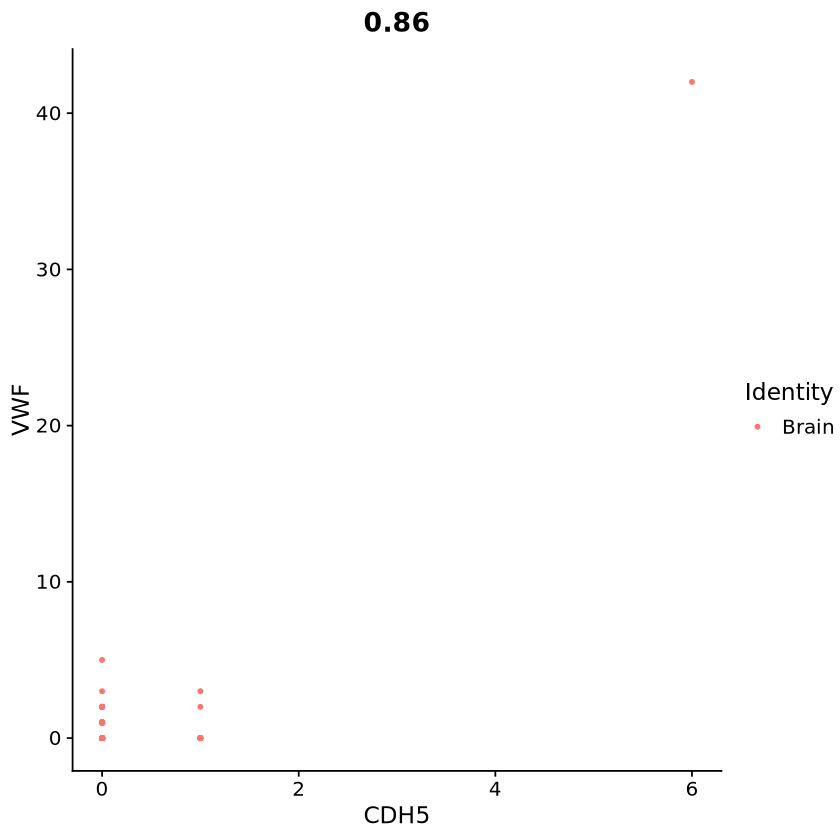

In [ ]:

#Generating scatter plots
genes <- c("MOG", "MBP", "CDH5", "VWF")
for (i in seq(1,4,1)) {
    for (j in seq(1,4,1)) {
        if (j > i) {
            print(FeatureScatter(selected_obj, feature1 = genes[i], feature2 = genes[j], slot = "counts"))
        }
    }
}

### 3. Which correlation coefficient is plotted above the plot produced by the "FeatureScatter" function?

In [ ]:
## Using Seurat documentation
## Correlation coefficient corresponds to Pearson correlation between the two features
?FeatureScatter

FeatureScatter             package:Seurat              R Documentation

_S_c_a_t_t_e_r _p_l_o_t _o_f _s_i_n_g_l_e _c_e_l_l _d_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Creates a scatter plot of two features (typically feature
     expression), across a set of single cells. Cells are colored by
     their identity class. Pearson correlation between the two features
     is displayed above the plot.

_U_s_a_g_e:

     FeatureScatter(
       object,
       feature1,
       feature2,
       cells = NULL,
       shuffle = FALSE,
       seed = 1,
       group.by = NULL,
       split.by = NULL,
       cols = NULL,
       pt.size = 1,
       shape.by = NULL,
       span = NULL,
       smooth = FALSE,
       combine = TRUE,
       slot = "data",
       plot.cor = TRUE,
       ncol = NULL,
       raster = NULL,
       raster.dpi = c(512, 512),
       jitter = FALSE,
       log = FALSE
     )
     
_A_r_g_u_m_e_n_t_s:

  object: Seurat object

featur

### 4. Count the number of peaks on *chr5* and *chrY*

In [17]:
## Create ATAC assay and add it to the object
selected_obj[["ATAC"]] <- CreateChromatinAssay(
    counts = counts_raw$Peaks[, Cells(selected_obj[["RNA"]])], # subset the matrix to keep only cells that are in the RNA object
    sep = c(":", "-"),
    fragments = "data/human_brain_3k_atac_fragments.tsv.gz",
    annotation = annotation,
    genome = "hg38",
    validate.fragments = T,
    min.features = 1,
    min.cells = 1
)


Computing hash



In [18]:
## Add the ATAC assay to the object
selected_obj <- subset(selected_obj, cells = Cells(selected_obj[["ATAC"]]))
selected_obj

An object of class Seurat 
162808 features across 3681 samples within 2 assays 
Active assay: RNA (28779 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC

In [19]:
## Get all features from ATAC assay
peaks <- row.names(selected_obj[['ATAC']]$counts)
peaks

[1] "chr1-180995-181723"        "chr1-191025-191934"       
    [3] "chr1-629469-630395"        "chr1-633551-634475"       
    [5] "chr1-778288-779198"        "chr1-816788-817671"       
    [7] "chr1-817893-818459"        "chr1-818576-819294"       
    [9] "chr1-827064-827944"        "chr1-869490-870405"       
   [11] "chr1-904287-905159"        "chr1-909851-910675"       
   [13] "chr1-920761-921663"        "chr1-923467-924355"       
   [15] "chr1-925408-925854"        "chr1-939927-940842"       
   [17] "chr1-958875-959767"        "chr1-960346-961074"       
   [19] "chr1-966481-967311"        "chr1-975768-976667"       
   [21] "chr1-983873-984780"        "chr1-999930-1000654"      
   [23] "chr1-1001576-1002424"      "chr1-1013015-1013931"     
   [25] "chr1-1019259-1020060"      "chr1-1024711-1025625"     
   [27] "chr1-1030994-1031908"      "chr1-1032665-1033533"     
   [29] "chr1-1040444-1041364"      "chr1-1059170-1060024"     
   [31] "chr1-1063654-1064499"      "chr1-1068877-1069727"     
   [33] "chr1-1074730-1075442"      "chr1-1079623-1080458"     
   [35] "chr1-1110411-1111262"      "chr1-1115810-1116718"     
   [37] "chr1-1121810-1122702"      "chr1-1151124-1151957"     
   [39] "chr1-1157217-1157806"      "chr1-1157963-1158820"     
   [41] "chr1-1173397-1174235"      "chr1-1182925-1183585"     
   [43] "chr1-1184965-1185853"      "chr1-1201082-1201948"     
   [45] "chr1-1208026-1208904"      "chr1-1225815-1226692"     
   [47] "chr1-1231660-1232586"      "chr1-1249996-1250862"     
   [49] "chr1-1273513-1274424"      "chr1-1281326-1282256"     
   [51] "chr1-1298624-1299519"      "chr1-1304362-1305256"     
   [53] "chr1-1307744-1308713"      "chr1-1324313-1325232"     
   [55] "chr1-1349010-1349948"      "chr1-1355140-1355999"     
   [57] "chr1-1358089-1358938"      "chr1-1371722-1372574"     
   [59] "chr1-1374915-1375829"      "chr1-1399009-1399916"     
   [61] "chr1-1406847-1407763"      "chr1-1415412-1416243"     
   [63] "chr1-1419732-1420652"      "chr1-1421038-1421844"     
   [65] "chr1-1425512-1426322"      "chr1-1426890-1427682"     
   [67] "chr1-1430167-1431068"      "chr1-1435237-1436107"     
   [69] "chr1-1440635-1441492"      "chr1-1441824-1442599"     
   [71] "chr1-1461998-1462925"      "chr1-1471223-1472122"     
   [73] "chr1-1504770-1505415"      "chr1-1505524-1505834"     
   [75] "chr1-1511549-1512432"      "chr1-1518410-1519180"     
   [77] "chr1-1540160-1541003"      "chr1-1550636-1551502"     
   [79] "chr1-1554620-1555452"      "chr1-1567530-1568391"     
   [81] "chr1-1574358-1575281"      "chr1-1599632-1600480"     
   [83] "chr1-1615151-1615961"      "chr1-1629895-1630654"     
   [85] "chr1-1630779-1631528"      "chr1-1632019-1632759"     
   [87] "chr1-1636447-1637387"      "chr1-1658652-1659577"     
   [89] "chr1-1677384-1678144"      "chr1-1678337-1679183"     
   [91] "chr1-1692385-1693392"      "chr1-1694273-1694952"     
   [93] "chr1-1723963-1724883"      "chr1-1726003-1726877"     
   [95] "chr1-1736073-1736927"      "chr1-1740684-1741389"     
   [97] "chr1-1745915-1746760"      "chr1-1748501-1749447"     
   [99] "chr1-1749949-1750704"      "chr1-1752224-1752776"     
  [101] "chr1-1758552-1759413"      "chr1-1763897-1764767"     
  [103] "chr1-1778004-1778891"      "chr1-1779912-1780806"     
  [105] "chr1-1787862-1788750"      "chr1-1799375-1800288"     
  [107] "chr1-1806772-1807578"      "chr1-1826912-1827707"     
  [109] "chr1-1833656-1834487"      "chr1-1840197-1841114"     
  [111] "chr1-1842696-1843605"      "chr1-1846723-1847653"     
  [113] "chr1-1853629-1854515"      "chr1-1858310-1859202"     
  [115] "chr1-1860822-1861684"      "chr1-1872941-1873865"     
  [117] "chr1-1890702-1891618"      "chr1-1905975-1906859"     
  [119] "chr1-1908733-1909621"      "chr1-1918978-1919899"     
  [121] "chr1-1943694-1944592"      "chr1-1946233-1947114"     
  [123] "chr1-1959712-1960579"      "chr1-1969030-1969905"     
  [125] "chr1-1978114-1978869"      

In [20]:
# Filtering peaks
lapply(c("chr5-", "chrY-"), function(chromosome){
    filter <- grepl(peaks, pattern=chromosome)
    selected_peaks <- peaks[filter]
    print(paste0("Peaks in ", chromosome, ":", length(selected_peaks)))
})

[1] "Peaks in chr5-:7647"
[1] "Peaks in chrY-:120"


[[1]]
[1] "Peaks in chr5-:7647"

[[2]]
[1] "Peaks in chrY-:120"

### 5. Count the fraction of peak counts on *chr5* and *chrY*

In [21]:
# Filtering peaks and calculating fraction
lapply(c("chr5-", "chrY-"), function(chromosome){
    filter <- grepl(peaks, pattern=chromosome)
    selected_peaks <- peaks[filter]
    fraction <- length(selected_peaks) / length(peaks)
    print(paste0("Fraction of peaks in ", chromosome, ": ", fraction))
})

[1] "Fraction of peaks in chr5-: 0.0570548164949377"
[1] "Fraction of peaks in chrY-: 0.000895328622909967"


[[1]]
[1] "Fraction of peaks in chr5-: 0.0570548164949377"

[[2]]
[1] "Fraction of peaks in chrY-: 0.000895328622909967"